In [1]:
pip install nelson_siegel_svensson

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
# Доходность к погашению ОФЗ с разным сроком погашения
df = pd.read_csv('DataCurve.csv')
term = df['Term'].astype (float)
yieldRZD = df['Yield'].astype (float)
df = df.sort_values(by=['Term'])
term = np.array(df['Term'])
yieldRZD = np.array(df['Yield'])
df

,Term,Yield
0,0.19,14.74
1,0.57,13.50
2,0.82,12.18
3,1.57,12.86
4,1.89,12.59
5,2.74,11.64
6,2.80,11.65
7,3.12,11.52
8,3.79,11.66
9,4.08,11.74


№3 Откалиброванная модель Нельсона-Зигеля

NelsonSiegelCurve(beta0=11.943095288097345, beta1=3.2999508897837297, beta2=-4.429806342870336, tau=0.9227123179751332)


Text(0, 0.5, 'Срок погашения, лет')

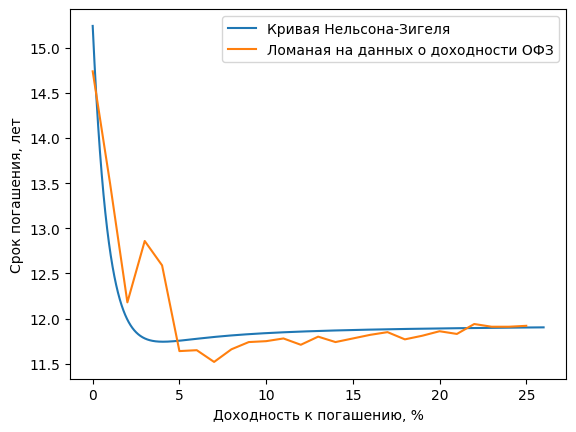

In [11]:
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
from nelson_siegel_svensson import NelsonSiegelCurve

curve, status = calibrate_ns_ols(term, yieldRZD, tau0=1.0)
assert status.success

y = curve
t = np.linspace(0, 26, 2000)
print (curve)
plot(t, y(t), yieldRZD)
plt.legend(['Кривая Нельсона-Зигеля', 'Ломаная на данных о доходности ОФЗ'])
plt.xlabel("Доходность к погашению, %")
plt.ylabel("Срок погашения, лет")

In [6]:
mean_squared_error(yieldRZD, y(term))

0.06244249472394225